<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_YB2/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [22]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [24]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)

0.900990099009901

* 재현율

In [25]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [31]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [27]:
from sklearn.preprocessing import Binarizer
import numpy as np

pred_proba = model_lor.predict_proba(X)

y_pred2 = (pred_proba[:,1] > 0.1).astype(np.int)

<ipython-input-27-d22836647271>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred2 = (pred_proba[:,1] > 0.1).astype(np.int)


In [28]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y, y_pred2))
print(accuracy_score(y, y_pred2))
print(precision_score(y, y_pred2))
print(recall_score(y, y_pred2))
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

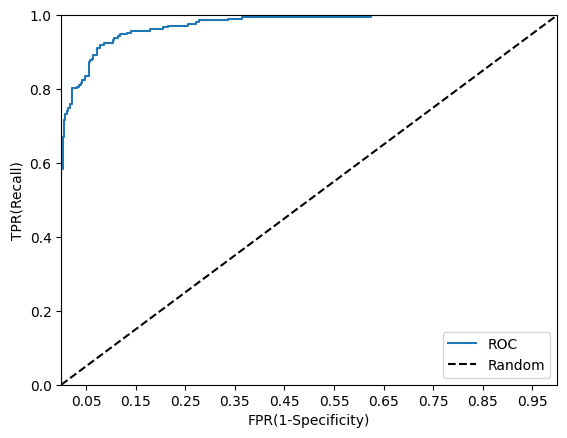

In [29]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1], 'k--', label='Random')
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y, pred_proba[:,1])

* ROC AUC 값

In [30]:
from sklearn.metrics import roc_auc_score

pred_proba = model_lor.predict_proba(X)[:,1]
roc_score = roc_auc_score(y, pred_proba)
roc_score

0.9741424871835527